Python - Visualizing a Wavelet de Haar

Objective: To show the forms basic of the function of escala and of the function wavelet for the transform of Haar, the wavelet more simples.

As the Code Funciona: 1. `pywt. Wavelet('haar')`: Creates a objeto wavelet of the família 'haar' using the librairy PyWavelets. 2. `wavelet_haar. Dec_lo`, `wavelet_haar. Dec_hi`: Acessa the coefficients of the filters of dewithposition (analysis) h ϕ and h ψ. For Haar, are `[1/sqrt(2), 1/sqrt(2)]` and `[-1/sqrt(2), 1/sqrt(2)]` or similair (escalonado). 3. `wavelet_haar. Wavefun(level=...)`: Calculates and retorna the forms of onda of the function of escala (ϕ) and of the function wavelet (ψ) in a determinado level of precision/dewithposition. * Retorna: `(phi, psi, x)` where `phi` and `psi` are the values of the functions and `x` is the axis of the tempo/space. 4. Visualization: Plota ϕ(x) and ψ(x).


--- Exemplo Prático: Funções de Escala e Wavelet de Haar ---
Filtros de decomposição de Haar (Lo_D, Hi_D): [0.7071067811865476, 0.7071067811865476], [-0.7071067811865476, 0.7071067811865476]
Filtros de reconstrução de Haar (Lo_R, Hi_R): [0.7071067811865476, 0.7071067811865476], [0.7071067811865476, -0.7071067811865476]


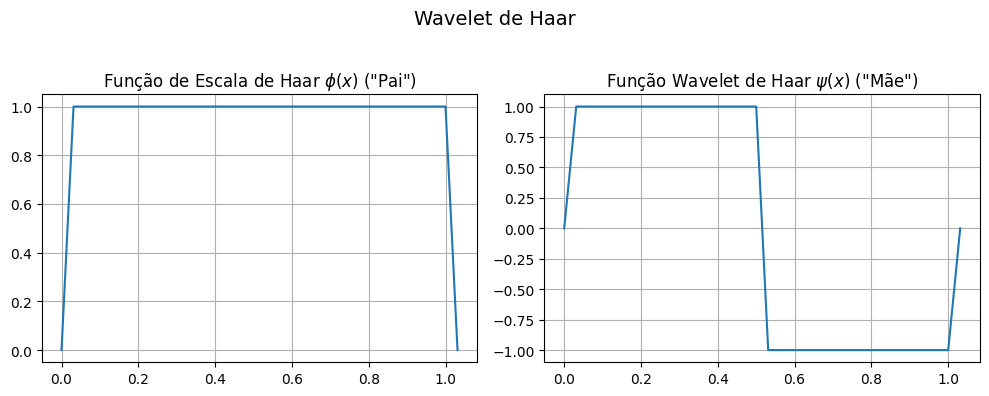

In [ ]:
# Exemplo Python: Visualizing a Wavelet de Haarprint("\n--- Exemplo Prático: Funções de Escala e Wavelet de Haar ---")
import pywt # Biblioteca PyWaveletsimport matplotlib.pyplot as plt

# Criar um objeto wavelet de Haarwavelet_haar = pywt.Wavelet('haar')
print(f"Filtros de decomposição de Haar (Lo_D, Hi_D): {wavelet_haar.dec_lo}, {wavelet_haar.dec_hi}")
print(f"Filtros de reconstrução de Haar (Lo_R, Hi_R): {wavelet_haar.rec_lo}, {wavelet_haar.rec_hi}")

# Obter as formas de onda para plotagem (phi = scaling, psi = wavelet)# Level=5 especifica the level of iteração for to generate the functionstry:
    phi_haar, psi_haar, x_haar = wavelet_haar.wavefun(level=5)
except Exception as e: # Some versões more antigas of pywt can not to have level alto for haar    print(f"Erro ao gerar wavefun com level=5 para Haar: {e}. Tentando level=1.")
    phi_haar, psi_haar, x_haar = wavelet_haar.wavefun(level=1)


# Visualizationfig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(x_haar, phi_haar); axs[0].set_title('Função de Escala de Haar $\phi(x)$ ("Pai")')
axs[0].grid(True)
axs[1].plot(x_haar, psi_haar); axs[1].set_title('Função Wavelet de Haar $\psi(x)$ ("Mãe")')
axs[1].grid(True)
plt.suptitle("Wavelet de Haar", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Interpretando the Results (Haar): * Function of Escala of Haar ϕ(x): Should aparecer as a function caixa (retangulair) of altura 1 between 0 and 1 (or a versão normalizada). Ela represents a average or approximation constant local. * Function Wavelet of Haar ψ(x): Should aparecer as a pulso retangulair positivo between 0 and 0.5, seguido by a pulso retangulair negativo of same amplitude between 0.5 and 1 (or a versão normalizada and transladada). Ela captura the difference or detalhe (a descontinuidade type step).

Python - FWT 1D with PyWavelets (Practice)

Objective: To apply the dewithposition and reconstruction wavelet 1D the a signal simples using the librairy `PyWavelets`.

As the Code Funciona: 1. Signal of Test: Creates a signal simples (ex: a step or a withbinação of senóides). 2. Dewithposition (DWT): * `pywt. Dwt(signal_1d, wavelet_tipo, mode='symmetric')`: Calculates a level of the DWT. * `signal_1d`: Signal of input. * `wavelet_tipo`: String especificando the wavelet (ex: 'haar', 'db4' - Daubechies 4). * `mode`: Especifica as deal with the edges of the signal (ex: 'symmetric', 'periodic'). * Retorna `(cA, cD)`: tuple with the coefficients of approximation (`cA`) and of detalhe (`cD`). 3. Dewithposition Multinível: * `pywt. Wavedec(signal_1d, wavelet_tipo, level=N)`: Performs `N` levels of dewithposition. * Retorna a list of arrays of coefficients: `[cA_N, cD_N, cD_{N-1},..., cD_1]`. 4. Reconstruction (IDWT): * `pywt. Idwt(cA, cD, wavelet_tipo, mode='symmetric')`: Reconstrói the signal from a pair `(cA, cD)`. * `pywt. Waverec(coeffs_multinivel, wavelet_tipo)`: Reconstrói the signal the pairtir of the list of coefficients of a dewithposition multinível. 5. Visualization: Plota the signal original, their coefficients wavelet and the signal reconstruído.


--- Exemplo Prático: FWT 1D com PyWavelets ---


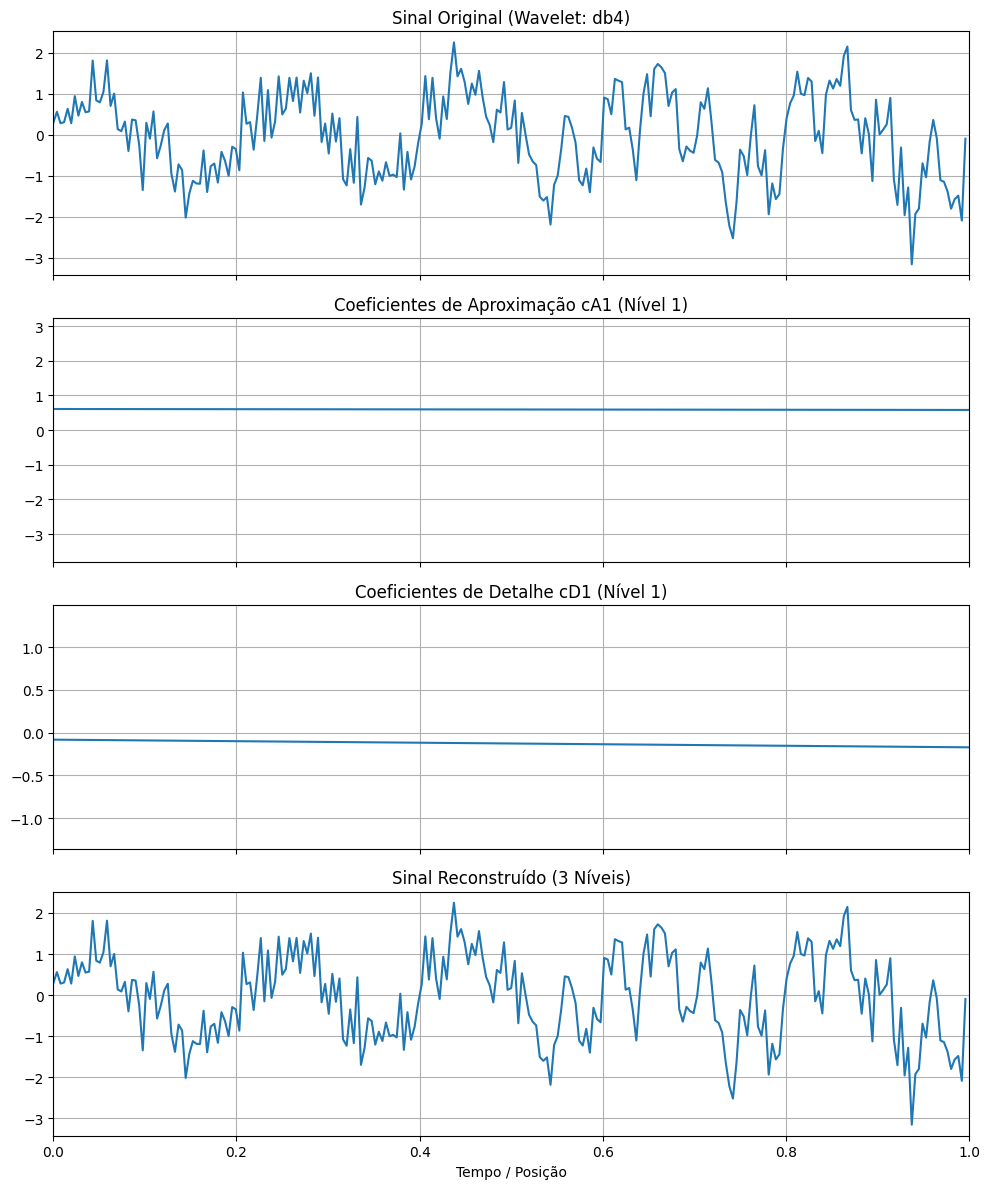

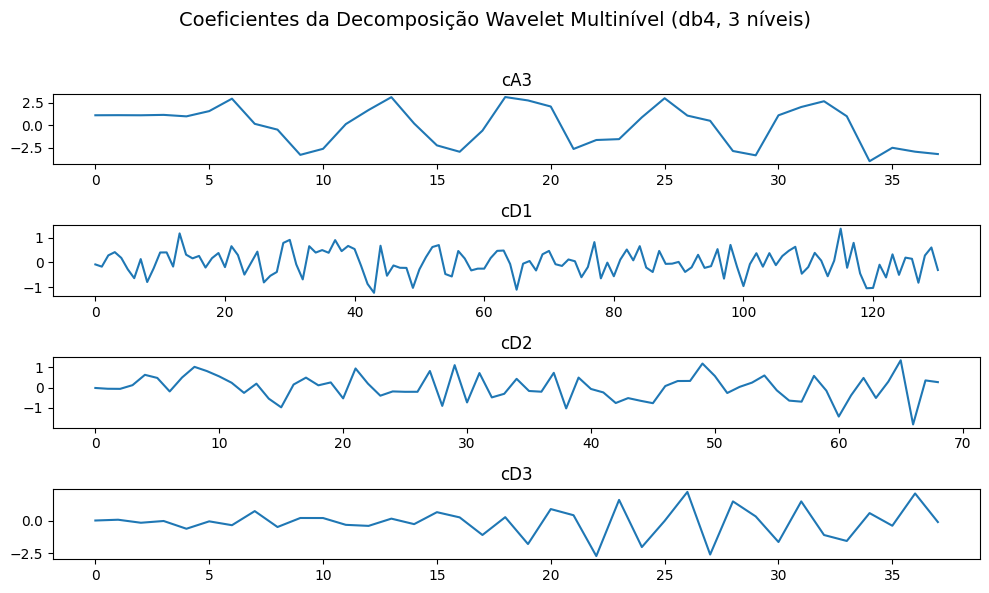

In [ ]:
# Exemplo Python: FWT 1D com PyWaveletsprint("\n--- Exemplo Prático: FWT 1D com PyWavelets ---")
import pywt
import matplotlib.pyplot as plt
import numpy as np

# 1. Sinal de Teste Simplest_sinal = np.linspace(0, 1, num=256, endpoint=False)
sinal_1d_ex = np.sin(2 * np.pi * 5 * t_sinal)  # Seno de 5 Hzsinal_1d_ex[128:] += np.sin(2 * np.pi * 20 * t_sinal[128:]) # Adiciona alta frequency in the segunda metadesinal_1d_ex += 0.5 * np.random.randn(len(t_sinal)) # Adiciona a little of noise
# 2. Decomposition Wavelet (1 level)wavelet_usada = 'db4' # Daubechies 4coeffs_1_nivel = pywt.dwt(sinal_1d_ex, wavelet=wavelet_usada, mode='symmetric')
cA1, cD1 = coeffs_1_nivel # Coefficients of approximation and detalhe of the level 1
# 3. Decomposition Multinível (ex: 3 levels)niveis_decomp = 3
coeffs_multinivel = pywt.wavedec(sinal_1d_ex, wavelet=wavelet_usada, level=niveis_decomp, mode='symmetric')
# Coeffs_multinivel is a list: [cA_N, cD_N, cD_{N-1},..., cD_1]cA_N = coeffs_multinivel[0]
cD_niveis = coeffs_multinivel[1:] # List of the cDs of cD_N until cD_1
# 4. Reconstruction# Reconstruction the partir of 1 levelsinal_reconstruido_1_nivel = pywt.idwt(cA1, cD1, wavelet=wavelet_usada, mode='symmetric')
# Reconstruction the partir of multiple levelssinal_reconstruido_multinivel = pywt.waverec(coeffs_multinivel, wavelet=wavelet_usada, mode='symmetric')

# Ajustar comprimento if the reconstruction tiver a pixel the more/less devido ao modo of edgeif len(sinal_reconstruido_1_nivel) != len(sinal_1d_ex):
    sinal_reconstruido_1_nivel = sinal_reconstruido_1_nivel[:len(sinal_1d_ex)]
if len(sinal_reconstruido_multinivel) != len(sinal_1d_ex):
    sinal_reconstruido_multinivel = sinal_reconstruido_multinivel[:len(sinal_1d_ex)]


# Visualizationfig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
axs[0].plot(t_sinal, sinal_1d_ex); axs[0].set_title(f"Sinal Original (Wavelet: {wavelet_usada})")
axs[1].plot(cA1); axs[1].set_title("Coeficientes de Aproximação cA1 (Nível 1)")
axs[2].plot(cD1); axs[2].set_title("Coeficientes de Detalhe cD1 (Nível 1)")
axs[3].plot(t_sinal, sinal_reconstruido_multinivel); axs[3].set_title(f"Sinal Reconstruído ({niveis_decomp} Níveis)")
for ax in axs: ax.grid(True); ax.set_xlim(0,1)
plt.xlabel("Tempo / Posição")
plt.tight_layout()
plt.show()

# Visualizar all the coefficients of the decomposition multinívelplt.figure(figsize=(10, 6))
plt.subplot(niveis_decomp + 1, 1, 1)
plt.plot(cA_N)
plt.title(f'cA{niveis_decomp}')
for i, cD_i in enumerate(reversed(cD_niveis)): # Plotar cD1, cD2,..., cDN    plt.subplot(niveis_decomp + 1, 1, i + 2)
    plt.plot(cD_i)
    plt.title(f'cD{i+1}')
plt.suptitle(f"Coeficientes da Decomposição Wavelet Multinível ({wavelet_usada}, {niveis_decomp} níveis)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Interpretando the Results (FWT 1D): * Signal Original: The signal of test, possivelmente with different withponents of frequency and/or transições. * Coefficients cA1 and cD1: - `cA1` (Approximation): A versão of the signal with metade of the withprimento, contendo the withponents of baixa frequency (suavizada). - `cD1` (Detalhe): Also with metade of the withprimento, contendo the withponents of alta frequency (the "differences" or detalhes) removidas for to obtain cA1.where the signal original muda rapidamente, cD1 will have values larger. * Signal Reconstruído: Should to be (quase) idêntico to the signal original, demonstrando the propriedade of reconstruction perfeita (if not houver quantization). * Coefficients Multinível: The graph mostrairá the coefficient of approximation final (cA N ​) in the topo, that is the versão more "grossa" and more curta of the signal. Below dele, the coefficients of detalhe cD N ​, cD N−1 ​,..., cD 1 ​. Note that cD 1 ​ has more samples (metade of the signal original) and captura the detalhes more finos (altas frequencies). CD N ​ has less samples and captura detalhes more grosseiros (frequencies more baixas inside of the banda of detalhe).

Exercise (FWT 1D): 1. Altere the `wavelet_usada` for `'haar'`, `'db1'` (Daubechies 1, that is equal the Haar), `'db8'` (Daubechies 8), or `'sym4'` (Symlet 4). Observe as the forms of the coefficients of detalhe mudam. Wavelets more suaves (as 'db8') tendem the to have coefficients of detalhe more distribuídos. 2. Altere the `niveis_dewithp`. What acontece with the withprimento of the cA N ​ and of the cD i ​? 3. Tente zero some coefficients of detalhe (ex: `coeffs_multinivel[-1][:] = 0` for zero cD 1 ​) before of call `pywt. Waverec`. As that afeta the signal reconstruído? (That is the base for withpressão and denoising).

Python - FWT 2D with PyWavelets (Practice)

Objective: To apply the dewithposition wavelet 2D the a image medical and visualize the sub-bandas resultantes.

As the Code Funciona: 1. Image of Test: `image_float_g` (image of the brain). 2. Dewithposition 2D (1 level): * `pywt. Dwt2(image_float_g, wavelet_tipo_2d, mode='symmetric')`: Calculates a level of the DWT 2D. * Retorna (cA, (cH, cV, cD)): A tuple where `cA` is the sub-banda of approximation (LL), and the segunda pairt is other tuple contendo the sub-bandas of detalhe horizontal (`cH` or LH), vertical (`cV` or HL) and diagonal (`cD` or HH). 3. Dewithposition 2D Multinível: * `pywt. Wavedec2(image_float_g, wavelet_tipo_2d, level=niveis_2d, mode='symmetric')`: Performs N levels of dewithposition. * Retorna a list of coefficients in the formato: `[cA_N, (cH_N, cV_N, cD_N), (cH_{N-1}, cV_{N-1}, cD_{N-1}),..., (cH_1, cV_1, cD_1)]`. 4. Visualization: * The sub-bandas are geralmente visualizadas withbinadas in a single airranjo (as in the Fig 7.29b) or sepairadamente. * The sub-bandas of detalhe (LH, HL, HH) geralmente have average next of zero, then can need of reescalonamento or uso of `vmin`, `vmax` in the `imshow` for visualize bem their estruturas.

Imagem 'brain' (fatia 5) carregada.


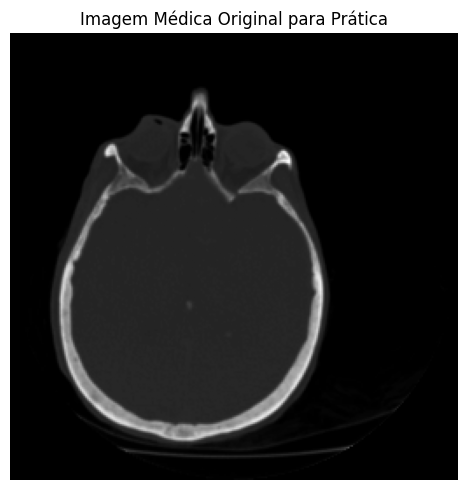

In [ ]:
# --- Importações necessary ---import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, img_as_ubyte, transform, exposure, util, filters, morphology
from scipy import ndimage
from numpy.fft import fft2, ifft2, fftshift, ifftshift # For the Bloco 4 of the practiceimport time
import cv2 # For desenhar círculos in the Tarefa 1.3
# --- Function Auxiliar for Plotar Múltiplas Images (CORRIGIDA) ---def plot_images(images, titles, cmaps=None, rows=1, cols=None, figsize=(15,5)):
    num_images = len(images)
    if cols is None:
        cols = (num_images + rows - 1) // rows

    fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False) # Squeeze=False garante that axes is always 2D
    axes_flat = axes.ravel()

    if cmaps is None:
        cmaps_list = ['gray'] * num_images
    elif isinstance(cmaps, str):
        cmaps_list = [cmaps] * num_images
    else:
        cmaps_list = list(cmaps)
        if len(cmaps_list) < num_images:
            cmaps_list.extend(['gray'] * (num_images - len(cmaps_list)))

    for i in range(len(axes_flat)):
        if i < num_images:
            img = images[i]
            title = titles[i]
            current_cmap = cmaps_list[i]

            axes_flat[i].imshow(img, cmap=current_cmap if img.ndim == 2 else None)
            axes_flat[i].set_title(title)
            axes_flat[i].axis('off')
        else:
            axes_flat[i].axis('off') # Desliga eixos extras
    plt.tight_layout()
    plt.show()

# --- Carregar Image Médica ---try:
    brain_volume = data.brain()
    if brain_volume.ndim == 3:
        slice_index = brain_volume.shape[0] // 2
        image_gray_orig = brain_volume[slice_index, :, :]
    elif brain_volume.ndim == 2:
        image_gray_orig = brain_volume
        slice_index = "N/A (Imagem 2D)"
    else:
        raise ValueError("Formato de imagem 'brain' não esperado.")
    print(f"Imagem 'brain' (fatia {slice_index if brain_volume.ndim == 3 else ''}) carregada.")
except Exception as e:
    print(f"Erro ao carregar 'brain': {e}. Usando 'camera' como fallback.")
    image_gray_orig = data.camera()

# These Are The VARIÁVEIS GLOBAIS For The Practiceimage_float_g = img_as_float(image_gray_orig.copy())
image_ubyte_g = img_as_ubyte(image_gray_orig.copy())
M_g, N_g = image_float_g.shape # dimensions globais for the practice
# Visualizar a imagem originalplot_images([image_ubyte_g], ["Imagem Médica Original para Prática"], cmaps=['gray'])

Imagem 'brain' (fatia 5) carregada.


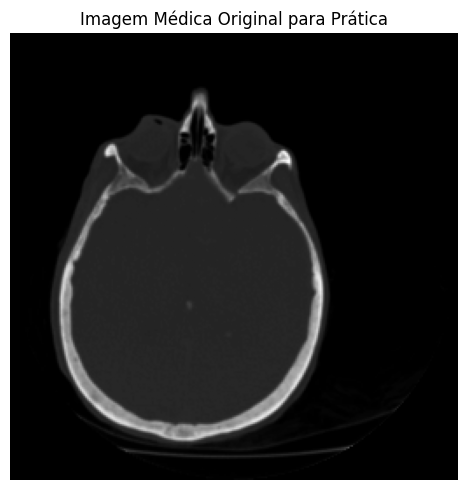

In [ ]:
# --- Importações necessary ---import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, img_as_ubyte, transform, exposure, util, filters, morphology
from scipy import ndimage
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import time
import cv2 # For desenhar círculos in the Tarefa 1.3
# --- Function Auxiliar for Plotar Múltiplas Images ---def plot_images(images, titles, cmaps=None, rows=1, cols=None, figsize=(15,5)):
    num_images = len(images)
    if cols is None:
        cols = (num_images + rows - 1) // rows

    fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False) # Squeeze=False garante that axes is always 2D
    axes_flat = axes.ravel()

    if cmaps is None:
        cmaps_list = ['gray'] * num_images
    elif isinstance(cmaps, str):
        cmaps_list = [cmaps] * num_images
    else:
        cmaps_list = list(cmaps)
        if len(cmaps_list) < num_images:
            cmaps_list.extend(['gray'] * (num_images - len(cmaps_list)))

    for i in range(len(axes_flat)):
        if i < num_images:
            img = images[i]
            title = titles[i]
            current_cmap = cmaps_list[i]

            axes_flat[i].imshow(img, cmap=current_cmap if img.ndim == 2 else None)
            axes_flat[i].set_title(title)
            axes_flat[i].axis('off')
        else:
            axes_flat[i].axis('off') # Desliga eixos extras
    plt.tight_layout()
    plt.show()

# --- Carregar Image Médica ---try:
    brain_volume = data.brain()
    if brain_volume.ndim == 3:
        slice_index = brain_volume.shape[0] // 2
        image_gray_orig = brain_volume[slice_index, :, :]
    elif brain_volume.ndim == 2:
        image_gray_orig = brain_volume
        slice_index = "N/A (Imagem 2D)"
    else:
        raise ValueError("Formato de imagem 'brain' não esperado.")
    print(f"Imagem 'brain' (fatia {slice_index if brain_volume.ndim == 3 else ''}) carregada.")
except Exception as e:
    print(f"Erro ao carregar 'brain': {e}. Usando 'camera' como fallback.")
    image_gray_orig = data.camera()

# These Are The VARIÁVEIS GLOBAIS For The Practiceimage_float_g = img_as_float(image_gray_orig.copy())
image_ubyte_g = img_as_ubyte(image_gray_orig.copy())
M_g, N_g = image_float_g.shape # dimensions globais for the practice
# Visualizar a imagem originalplot_images([image_ubyte_g], ["Imagem Médica Original para Prática"], cmaps=['gray'])

def plot_images_c5(images, titles, cmaps=None, rows=1, cols=None, figsize=(15,5)):
    num_images = len(images)
    if cols is None:
        cols = (num_images + rows - 1) // rows
    fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False)
    axes_flat = axes.ravel()
    if cmaps is None: cmaps_list = ['gray'] * num_images
    elif isinstance(cmaps, str): cmaps_list = [cmaps] * num_images
    else:
        cmaps_list = list(cmaps)
        if len(cmaps_list) < num_images: cmaps_list.extend(['gray']*(num_images-len(cmaps_list)))
    for i in range(len(axes_flat)):
        if i < num_images:
            img, title, cmap_val = images[i], titles[i], cmaps_list[i] # Renomeado cmap para cmap_val            axes_flat[i].imshow(img, cmap=cmap_val if img.ndim==2 else None); axes_flat[i].set_title(title); axes_flat[i].axis('off')
        else: axes_flat[i].axis('off')
    plt.tight_layout(); plt.show()



--- Exemplo Prático: FWT 2D com PyWavelets ---


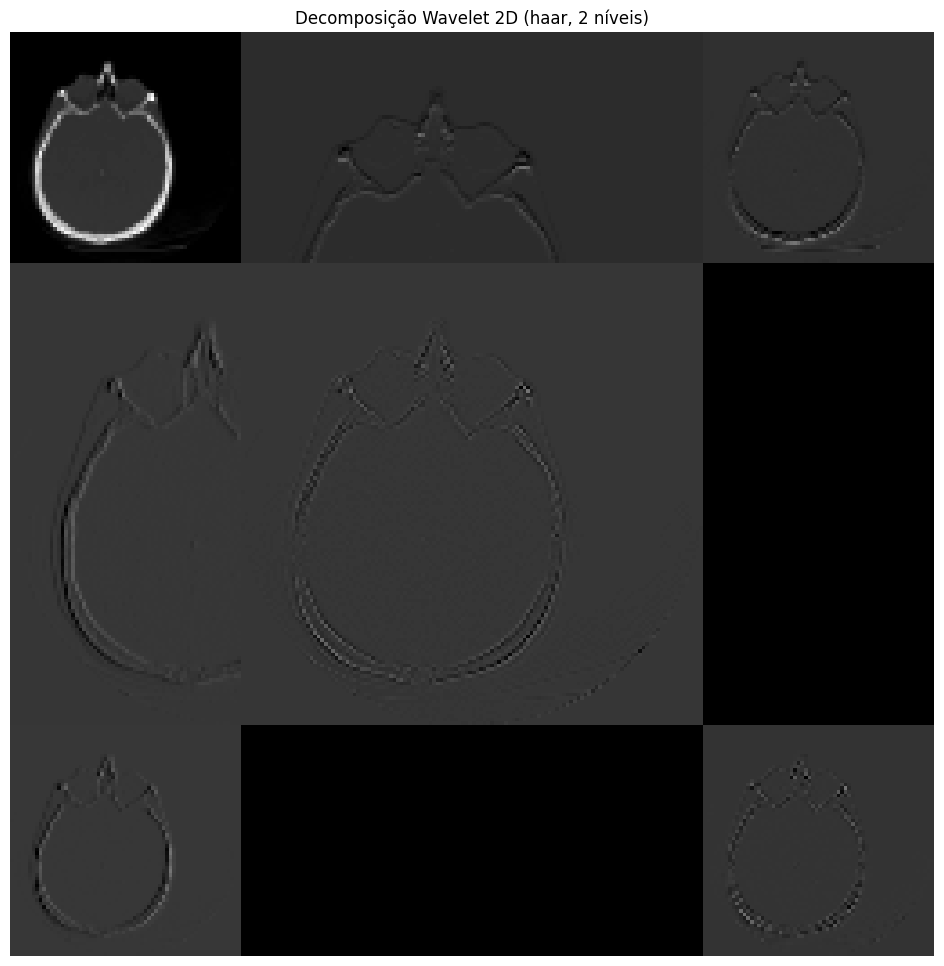

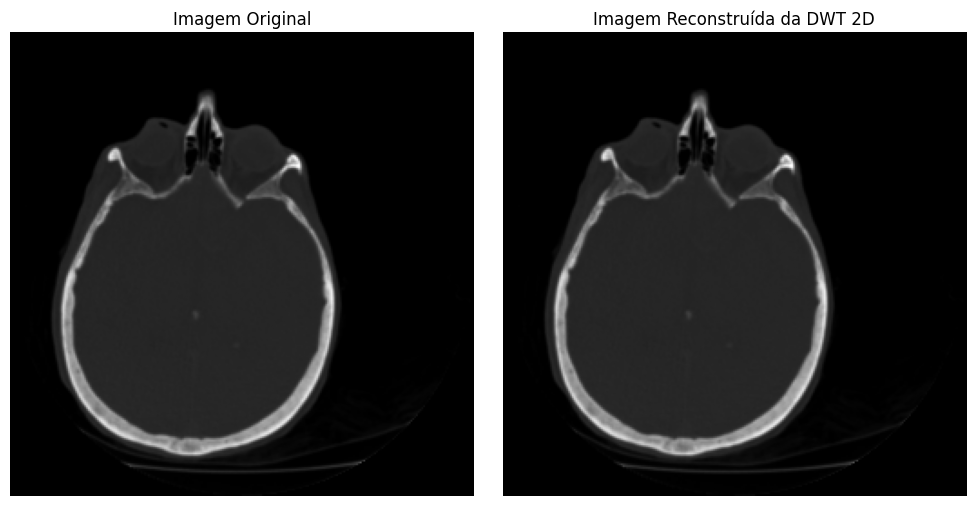

Reconstrução 2D é próxima da original.


In [ ]:
# Exemplo Python: FWT 2D com PyWaveletsprint("\n--- Exemplo Prático: FWT 2D com PyWavelets ---")
# Usar image_float_g
wavelet_usada_2d = 'haar' # Haar is boa for visualization inicial of the sub-bandasniveis_decomp_2d = 2    # Number of levels of decomposition
# Decomposition Wavelet 2D Multinívelcoeffs_img_multinivel = pywt.wavedec2(image_float_g, wavelet=wavelet_usada_2d,
                                      level=niveis_decomp_2d, mode='periodization')
# Coeffs_img_multinivel is a list: [cA_N, (cH_N, cV_N, cD_N),..., (cH_1, cV_1, cD_1)]
# Preparar a image for visualization of all the sub-bandas# (Similar à representação piramidal)# Pega the cA of the last levelcA_final = coeffs_img_multinivel[0]
reconstrucao_visual = cA_final.copy()

# Adicionar the sub-bandas of detalhe of each level for visualization# The ordem of the detalhes in coeffs_img_multinivel[1:] is of N until 1for i, (cH_i, cV_i, cD_i) in enumerate(reversed(coeffs_img_multinivel[1:])):
    # level atual of the pirâmide (of the more grosso for the more fino)    nivel_atual_piramide = niveis_decomp_2d - 1 - i

    # For visualization, normalizar the coefficients of detalhe (eles have média next of zero)    cH_i_vis = exposure.rescale_intensity(cH_i, out_range=(0,1))
    cV_i_vis = exposure.rescale_intensity(cV_i, out_range=(0,1))
    cD_i_vis = exposure.rescale_intensity(cD_i, out_range=(0,1))

    # Combinar in a image larger for visualization    # O cA atual (reconstrucao_visual) vai no quadrante superior esquerdo    # The detalhes vão in the others quadrantes    # This reconstruction visual is for the level atual of detalhe
    # To obtain the dimensions atuais for combinar    rows_cA, cols_cA = reconstrucao_visual.shape
    rows_cH, cols_cH = cH_i_vis.shape # CH, cV, cD of the even level have the same dimensions
    # To create a new tela for the next level of the pirâmide visual    nova_tela = np.zeros((rows_cA + rows_cH, cols_cA + cols_cH))

    nova_tela[0:rows_cA, 0:cols_cA] = reconstrucao_visual # LL (approximation of the level previous)    nova_tela[0:rows_cH, cols_cA:cols_cA+cols_cH] = cH_i_vis # LH    nova_tela[rows_cA:rows_cA+rows_cH, 0:cols_cH] = cV_i_vis # HL    nova_tela[rows_cA:rows_cA+rows_cH, cols_cA:cols_cA+cols_cH] = cD_i_vis # HH
    reconstrucao_visual = nova_tela # Atualiza for the next level of the pirâmide
# Reconstruir the image completa for verificaçãoimg_reconstruida_2d = pywt.waverec2(coeffs_img_multinivel, wavelet=wavelet_usada_2d, mode='periodization')


# Visualizationplt.figure(figsize=(12,12))
plt.imshow(reconstrucao_visual, cmap='gray')
plt.title(f"Decomposição Wavelet 2D ({wavelet_usada_2d}, {niveis_decomp_2d} níveis)")
plt.axis('off')
plt.show()

plot_images_c5([image_float_g, img_reconstruida_2d],
               ["Imagem Original", "Imagem Reconstruída da DWT 2D"],
               cmaps=['gray','gray'], figsize=(10,5))

# Checar if the reconstruction is next of the originalif np.allclose(image_float_g, img_reconstruida_2d):
    print("Reconstrução 2D é próxima da original.")
else:
    print("Reconstrução 2D difere da original (verificar precisão ou modo de borda).")
    # print(f"Max diff: {np.max(np.abs(image_float_g - img_reconstruida_2d))}")

Interpretando the Results (FWT 2D): 1. Dewithposition Wavelet 2D (Visualization Piramidal): * The image exibida mostrairá the structure piramidal of the dewithposition. * In the canto superior esquerdo, the sub-banda LL (approximation) of the last escala of dewithposition (cA N ​). This is a versão in baixa resolution and smaller of the image original. * Ao redor dela (or in levels progressivamente larger), the sub-bandas of detalhe (LH, HL, HH) of each level. * LH (Detalhe Horizontal): enhances edges and estruturas verticais in the image original. * HL (Detalhe Vertical): enhances edges and estruturas horizontais. * HH (Detalhe Diagonal): enhances edges and estruturas diagonais. * The sub-bandas of detalhe will have muitas áreas escuras (values next of zero) if the image tiver regions suaves, and values more altos (clairos or escuros, dependendo of the normalização for visualization) where houver edges or texturas. 2. Image Reconstruída: Should to be visualmente (quase) idêntica à image original, demonstrando the capacidade of reconstruction perfeita of the transform.

Exercise (FWT 2D): 1. modify Coefficients: after the dewithposition (`coeffs_img_multinivel = pywt. Wavedec2(...)`): * Tente zero a of the sub-bandas of detalhe of the first level before of rebuild. For example, for zero the detalhes horizontais of the level 1 (the more fino): `coeffs_mod = coeffs_img_multinivel. Copy()` `cH1, cV1, cD1 = coeffs_mod[-1]` (detalhes of the level 1) `coeffs_mod[-1] = (np.Zeros_like(cH1), cV1, cD1)` `img_rec_mod = pywt. Waverec2(coeffs_mod, wavelet_usada_2d, mode='periodization')` * Visualize `img_rec_mod`. What aconteceu with the edges verticais in the image? * Faça the even zerando `cV1` (HL) and after `cD1` (HH). Observe the efeitos. 2. change Wavelet: Altere `wavelet_usada_2d` for `'db4'` or `'sym4'`. As the apairência of the sub-bandas of detalhe muda?